# Capstone Project - The Battle of Neighborhoods (Week 2)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data</a></span><ul class="toc-item"><li><span><a href="#Defining-the-data-to-be-employed" data-toc-modified-id="Defining-the-data-to-be-employed-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Defining the data to be employed</a></span></li><li><span><a href="#Getting-and-cleaning-the-data" data-toc-modified-id="Getting-and-cleaning-the-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Getting and cleaning the data</a></span></li></ul></li><li><span><a href="#Methodology" data-toc-modified-id="Methodology-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Methodology</a></span><ul class="toc-item"><li><span><a href="#Arts-&amp;-Entertainment-(category-0)" data-toc-modified-id="Arts-&amp;-Entertainment-(category-0)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Arts &amp; Entertainment (category 0)</a></span></li><li><span><a href="#College-&amp;-University-(category-1)" data-toc-modified-id="College-&amp;-University-(category-1)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>College &amp; University (category 1)</a></span></li><li><span><a href="#Food-(category-3)" data-toc-modified-id="Food-(category-3)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Food (category 3)</a></span></li><li><span><a href="#Nightlife-spot-(category-4)" data-toc-modified-id="Nightlife-spot-(category-4)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Nightlife spot (category 4)</a></span></li><li><span><a href="#Outdoors-&amp;-Recreation-(category-5)" data-toc-modified-id="Outdoors-&amp;-Recreation-(category-5)-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Outdoors &amp; Recreation (category 5)</a></span></li><li><span><a href="#Professional-&amp;-Other-Places-(category-6)" data-toc-modified-id="Professional-&amp;-Other-Places-(category-6)-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Professional &amp; Other Places (category 6)</a></span></li><li><span><a href="#Residence-(category-7)" data-toc-modified-id="Residence-(category-7)-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Residence (category 7)</a></span></li><li><span><a href="#Shop-&amp;-Service-(category-8)" data-toc-modified-id="Shop-&amp;-Service-(category-8)-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Shop &amp; Service (category 8)</a></span></li><li><span><a href="#Travel-&amp;-Transport-(category-9)" data-toc-modified-id="Travel-&amp;-Transport-(category-9)-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>Travel &amp; Transport (category 9)</a></span></li></ul></li><li><span><a href="#Results" data-toc-modified-id="Results-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Results</a></span></li><li><span><a href="#Discussion" data-toc-modified-id="Discussion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Discussion</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Acknowledgements" data-toc-modified-id="Acknowledgements-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Acknowledgements</a></span></li></ul></div>

## Introduction

The objective of this project is to create a way for a Real State Agency to select the best region of Greater London to offer their clients. The idea is to determine the regions with the greater concentration of venues of each category that can be found in Foursquare (which are 'Arts & Entertainment', 'College & University', 'Food', 'Nightlife Spot', 'Outdoors & Recreation', 'Professional & Other Places', 'Residence', 'Shop & Service', and 'Travel & Transport'). This way, the agency can adapt their offers of residence to rent to match the interests of specific clients, depending on their priorities.

Let's say, for example, that a couple wants to rent a flat in Greater London, and that this couple greatly values visits to museums and the like as a form of leisure. With knowledge about the regions where "Art & Entertainment" venues are more concentrated, the agency can suggest flats in these regions for the couple.

In a similar way, a client might value spending their leisure time in parks and other outdoor venues. Then the Real State Agency can accommodate his desire by suggesting a flat located in a region of high concentration of "Outdoors & Recreation" venues.

So the stakeholders here are Real State Agencies in the area of Greater London, and the project will provide information to them that can help them better accommodate their clients' needs.

## Data

### Defining the data to be employed

Information about all points of interest (hereafter POI) in the Greater London will be collected from Foursquare using its Places API (https://enterprise.foursquare.com/products/places), for which I created a free developer account ("Personal" tier). This account allows for 99,500 regular calls per day, more than enough to collect the necessary data. Since this data will be relatively bulky, after retrieval from the Foursquare's database, it will be persisted to my local drive, so that analysis can ensue without the need to download everything again, should something wrong happen.

In order to check if the location of the POI is inside the territory of the Greater London, it should suffice to check the city name in the Foursquare data. However, I found that this particular bit of information is relatively inconsistent in the Foursquare database. The city name is often incorrect, or even absent (at least for the area of the Greater London). So I decided to use a more robust, though slightly more convoluted, approach. This is composed of 1 to 4 steps, as follows:

1. Using the POI latitude and longitude as input parameters, its postal code will be obtained from the Bing Maps REST Services (https://docs.microsoft.com/en-us/bingmaps/rest-services/). For this purpose, a "Basic/Dev/Test" account was created. Then, with the postal code as input, the name of the city in which the POI is located will be obtained using Postcode.io (http://api.postcodes.io/) - this service does not demand the use of a key, so no account needs to be created.

2. If a valid postal code (2 sequences of 3 alphanumeric characters, separated by a space) cannot be fetched from Bing, the algorithm will verify if a valid postal code is available in the Foursquare data. If yes, Postcode.io will be consulted using the Foursquare postal code.

3. If no postal code can be obtained from either Bing or Foursquare, the algorithm will try to fetch the city name directly from the Foursquare data.

4. Finally, if step 3 fails, the POI is dropped.

The POI will be kept if its city name is in the list of the 32 Greater London boroughs. This list will be taken from the first table of https://en.wikipedia.org/wiki/London_boroughs. Please, note that although the correct denomination of the Greater London administrative divisons is borough, this data can be found in different databases under diverse labels. In Foursquare, it is called (when present...) "city". In Postcode.io it is labeled "admin_district".

The data that will be used for determining the regions of high concentration of venues for each category is the location of each venue (latitude and longitude), and the category to which it pertains. Analysis will be composed of 2D histograms of the venues, grouped by category.

### Getting and cleaning the data

First we import the necessary modules:

In [41]:
import requests
import pandas as pd
import numpy as np
from pyproj import Proj
import math
import folium
import pickle
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

Now we define the data needed to access Foursquare and Bing:

In [42]:
FOURSQUARE_CLIENT_ID = 'B4VGNB4EAPO2VA2GPPBPARNJOGW4LE1SAV4YNH4G4KAR0IFG'
FOURSQUARE_CLIENT_SECRET = 'FG5GCAFKU3E3MSSG25QEU4YNVSRYNPZDMXQFEIJZBNZ52S50'
FOURSQUARE_VERSION = '20180605'
BING_KEY = 'Atm4bmL7hptbxYV1-SAg8mrF7RnSdpAPpB5Xj9A5-RNxS42nEksJ38OYGnS0wO4h'

We define functions to convert between latitude/longitude and cartesian coordinates, using the pyproj module. These functions are tested converting the coordinates of the center of London from lat/lon to utm, and back:

In [43]:
def lonlat_to_xy(lon, lat):
    p = Proj(proj='utm',zone=33,ellps='WGS84', preserve_units=False)
    xy = p(lon, lat)
    return xy[0], xy[1]

def xy_to_lonlat(x, y):
    p = Proj(proj='utm', zone=33, ellps='WGS84', preserve_units=False)
    lonlat = p(x, y, inverse=True)
    return lonlat[0], lonlat[1]

def calc_xy_distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    return math.sqrt(dx*dx + dy*dy)

london_center=[51.4914995,-0.0889]
x, y = lonlat_to_xy(london_center[1], london_center[0])
print('London center UTM X={}, Y={}'.format(x, y))
lo, la = xy_to_lonlat(x, y)
print('London center longitude={}, latitude={}'.format(lo, la))

London center UTM X=-544714.2265471916, Y=5813248.535185799
London center longitude=-0.08889999999999917, latitude=51.49149950000001


It worked.

Now it is time to start querying the Foursquare database to obtain coordinates of all venues in the Greater London. But there are for sure many venues, and the Foursquare API returns no more than 50 venues in each query. So it is necessary to subdivide the area of interest in small regions for which less than 50 results will be returned in each query.

To do so, we divide the area in circular regions with a 600 m radius in an hexagonal configuration. The following code creates vectors with the latitudes and longitudes of such regions:

In [44]:
london_center_x, london_center_y = lonlat_to_xy(london_center[1], london_center[0]) # City center in Cartesian coordinates

k = math.sqrt(3) / 2 # Vertical offset for hexagonal grid cells
x_min = london_center_x - 36000
x_step = 1200
y_min = london_center_y - 36000 - (int(126/k)*k*3600 - 72000)/2
y_step = 1200 * k 

latitudes = []
longitudes = []
distances_from_center = []
xs = []
ys = []
for i in range(0, int(378/k)):
    y = y_min + i * y_step
    x_offset = 1800 if i%2==0 else 0
    for j in range(0, 378):
        x = x_min + j * x_step + x_offset
        distance_from_center = calc_xy_distance(london_center_x, london_center_y, x, y)
        if (distance_from_center <= 36001):
            lon, lat = xy_to_lonlat(x, y)
            latitudes.append(lat)
            longitudes.append(lon)
            distances_from_center.append(distance_from_center)
            xs.append(x)
            ys.append(y)

print(len(latitudes), ' regions.')

3257  regions.


We have created 3257 regions. Let's plot a map with these regions, to better illustrate what we have done:

In [45]:
map_london = folium.Map(location=london_center, zoom_start=13)
folium.Marker(london_center, popup='Greater London').add_to(map_london)
for lat, lon in zip(latitudes, longitudes):
    folium.Circle([lat, lon], radius=600, color='blue', fill=False).add_to(map_london)
map_london

Now we query a Wikipedia page to get a list with the names of the 32 boroughs into which Greater London is divided:

In [46]:
boroughs = pd.read_html("https://en.wikipedia.org/wiki/London_boroughs")

In [47]:
boroughs = boroughs[2]['London borough'].str.replace('(\[(.*?)\])','').str.lower()
boroughs


0                     camden
1                  greenwich
2                    hackney
3                hammersmith
4                  islington
5     kensington and chelsea
6                    lambeth
7                   lewisham
8                  southwark
9              tower hamlets
10                wandsworth
11               westminster
12                   barking
13                    barnet
14                    bexley
15                     brent
16                   bromley
17                   croydon
18                    ealing
19                   enfield
20                  haringey
21                    harrow
22                  havering
23                hillingdon
24                  hounslow
25      kingston upon thames
26                    merton
27                    newham
28                 redbridge
29      richmond upon thames
30                    sutton
31            waltham forest
Name: London borough, dtype: object

Now we query Foursquare to get an up-to-date list with the venue categories:

In [48]:
url = 'https://api.foursquare.com/v2/venues/categories?client_id={}&client_secret={}&v={}'.format(
            FOURSQUARE_CLIENT_ID, 
            FOURSQUARE_CLIENT_SECRET, 
            FOURSQUARE_VERSION)

categories = requests.get(url).json()

In [49]:
categories_names = [item['name'] for item in categories['response']['categories']]
categories_ids = [item['id'] for item in categories['response']['categories']]

In [50]:
categories_names

['Arts & Entertainment',
 'College & University',
 'Event',
 'Food',
 'Nightlife Spot',
 'Outdoors & Recreation',
 'Professional & Other Places',
 'Residence',
 'Shop & Service',
 'Travel & Transport']

And now we query each of our 3257 circular regions, to get all venues in each, and accumulate the results in a dictionary called *venues*.
The following code block takes a long time to be executed. It is presented only to show how it was done, but it is advised that it not be executed. This notebook is made available with a pickle file that contains the complete results of the queries, and can be quickly read into the *venues* variable.
For a description of the query steps, see Section [Defining the data to be employed](###Defining-the-data-to-be-employed).

```python

# Do not run this cell as a code block, as it takes too much time!
# Run, instead, the next cell, which loads a pickle file that contains
# the result of this cell into the *venues* variable.

radius = 600
limit = 50
venues={}

for cat in categories_names:
    venues[cat] = []

limits = range(0,3251,50)

for i in range(65):

    for counter in range(limits[i], limits[i+1]):    
    
        print(counter)
    
        for cat_name, cat_id in zip(categories_names, categories_ids):
            url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(FOURSQUARE_CLIENT_ID, FOURSQUARE_CLIENT_SECRET, FOURSQUARE_VERSION, latitudes[counter], longitudes[counter],cat_id, radius, limit)
            results = requests.get(url).json()
            try:
                for item in results['response']['groups'][0]['items']:
                    found_postcode = False
                    url_bing = 'http://dev.virtualearth.net/REST/v1/Locations/{},{}?key={}'.format(item['venue']['location']['lat'],item['venue']['location']['lng'],BING_KEY)
                    result_bing = requests.get(url_bing).json()
                    postcode = result_bing['resourceSets'][0]['resources'][0]['address']['postalCode']
                    if (len(postcode) == 7):
                        found_postcode = True
                        
                    if (found_postcode == False):    
                        postcode= item['venue']['location']['postalCode']
                        if (len(postcode) == 7):
                            found_postcode = True
                        
                    if (found_postcode == True):   
                        url = 'https://api.postcodes.io/postcodes/{}'.format(postcode)
                        place = requests.get(url).json()
                        admin_district = place['result']['admin_district']
                    else:
                        admin_district = item['venue']['location']['city']
                        
                    if admin_district.lower() not in boroughs.values:
                        continue
                    venues[cat_name].append([counter,admin_district,postcode,item['venue']['name'], item['venue']['location']['lat'], item['venue']['location']['lng']])
            except:
                continue
    filename = 'dict_' + str(limits[i+1]) + '.pickle'
    with open(filename, 'wb') as handle:
        pickle.dump(venues, handle, protocol=pickle.HIGHEST_PROTOCOL)    
```

Now we execute the following code block, which load the pickle file which contains the data that was queried from Foursquare, and which will be used for analysis.

In [51]:
with open('./complete_data.pickle', 'rb') as handle:
    venues = pickle.load(handle)

## Methodology

First, let's take a look at how many venues of each category we got for Greater London:

In [52]:
for cat in categories_names:
    print(cat,": ",len(venues[cat]))

Arts & Entertainment :  1029
College & University :  1322
Event :  16
Food :  5256
Nightlife Spot :  2446
Outdoors & Recreation :  2586
Professional & Other Places :  4326
Residence :  787
Shop & Service :  6234
Travel & Transport :  2733


We will ignore the *event* category for two reasons:
- It has too few results.
- It is only relevant at the time of the query.

The main analysis will consist of plotting 2d histograms of the venues, grouped by category. The recommended places to rent will be those with higher density of the desired venue.

First, let's determine the x_axis and y_axis ranges taking into account all venues of all categories (except "Event"). This way we can create 2d histograms with the same binnings, so that they are mutually comparable.

In [79]:
cat = 0
vx = []
vy = []

for category in categories_names:
    if category == "Event":
        continue
    for venue in venues[category]:
        tmp = lonlat_to_xy(venue[5],venue[4])
        vx.append(tmp[0])
        vy.append(tmp[1])
        
x_min = min(vx)
x_max = max(vx)
x_range = x_max - x_min
y_min = min(vy)
y_max = max(vy)
y_range = y_max - y_min

print(x_min,x_max,y_min,y_max)


print("x_min = ", x_min)
print("x_max = ", x_max)
print("x_range = ", x_range)

print()

print("y_min = ", y_min)
print("y_max = ", y_max)
print("y_range = ", y_range)


        

-575399.5972424755 -509305.6641365426 5788898.39715245 5836892.24136406
x_min =  -575399.5972424755
x_max =  -509305.6641365426
x_range =  66093.9331059329

y_min =  5788898.39715245
y_max =  5836892.24136406
y_range =  47993.844211610034


In [80]:
venues['Food'][0]

[525,
 'Croydon',
 'CR5 1EH',
 "Danny's Fish & Chips",
 51.30710645727805,
 -0.12000971782057364]

In [54]:
hist_range = [[-576000,-509000],[5788000,5837000]]
hist_bins = [int((hist_range[0][1] - hist_range[0][0]) / 1000), int((hist_range[1][1] - hist_range[1][0]) / 1000)]
hist_bins

[67, 49]

Let's define a function that takes a 2D histogram and outputs the latitude and longitude limits of the bins with count above a given threshold:

In [55]:
def find_high_values_2dhist(threshold, hist):
    result = []
    for row in range(hist[0].shape[0]):
        for column in range(hist[0].shape[1]):
            if hist[0][row][column] >= threshold:
                min_x = hist[1][row]
                max_x = hist[1][row + 1]
                min_y = hist[2][column] 
                max_y = hist[2][column + 1]
                tmp = xy_to_lonlat(min_x,min_y)
                min_lat = tmp[1] 
                min_lon = tmp[0]
                tmp = xy_to_lonlat(max_x,max_y)
                max_lat = tmp[1]
                max_lon = tmp[0]
                result.append([min_lat, max_lat, min_lon, max_lon])
    return result

Now we'll look at each venue category and get the densest bns. These are defined arbitrarily as those bins with counts greater than or equal to 80 % of the count in the most dense bin.

In [56]:
high_density_regions = []

### Arts & Entertainment (category 0)

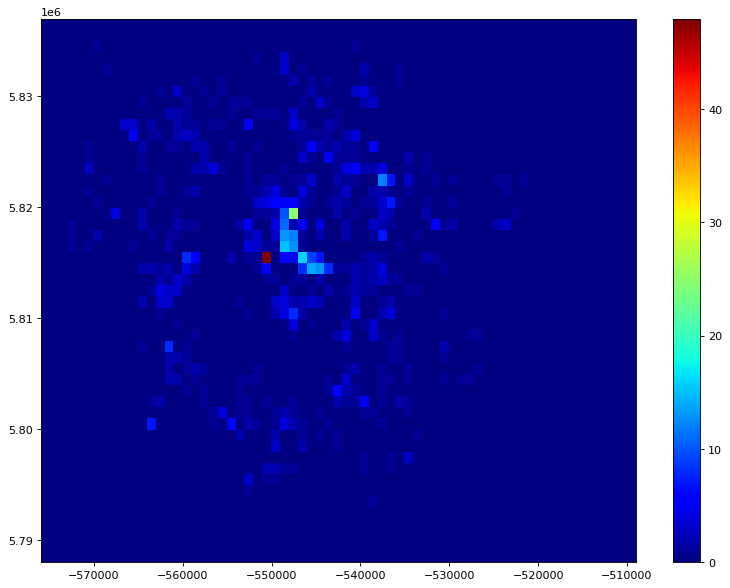

In [57]:
cat = 0
vx = []
vy = []

for venue in venues[categories_names[cat]]:
    tmp = lonlat_to_xy(venue[5],venue[4])
    vx.append(tmp[0])
    vy.append(tmp[1])

plt.figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')    
    
hist = plt.hist2d(vx, vy, cmap=plt.cm.jet, bins=hist_bins,range=hist_range)

plt.colorbar()
plt.show()

In [58]:
high_density = find_high_values_2dhist(max(hist[0].flat) * 0.8, hist)
for venue in high_density:
    venue.append(cat)
    high_density_regions.append(venue)

### College & University (category 1)

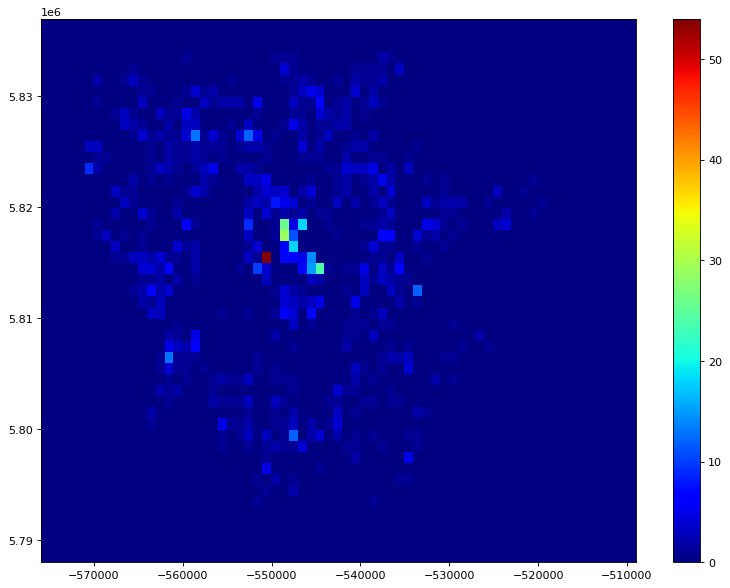

In [59]:
cat = 1
vx = []
vy = []

for venue in venues[categories_names[cat]]:
    tmp = lonlat_to_xy(venue[5],venue[4])
    vx.append(tmp[0])
    vy.append(tmp[1])

plt.figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')    
    
hist = plt.hist2d(vx, vy, cmap=plt.cm.jet, bins=hist_bins,range=hist_range)

plt.colorbar()
plt.show()

In [60]:
high_density = find_high_values_2dhist(max(hist[0].flat) * 0.8, hist)
for venue in high_density:
    venue.append(cat)
    high_density_regions.append(venue)

### Food (category 3)

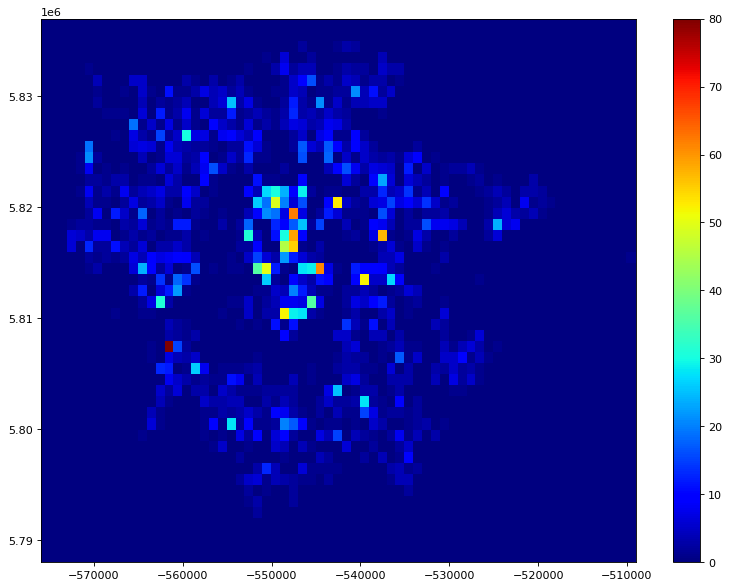

In [61]:
cat = 3
vx = []
vy = []

for venue in venues[categories_names[cat]]:
    tmp = lonlat_to_xy(venue[5],venue[4])
    vx.append(tmp[0])
    vy.append(tmp[1])

plt.figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')    
    
hist = plt.hist2d(vx, vy, cmap=plt.cm.jet, bins=hist_bins,range=hist_range)

plt.colorbar()
plt.show()

In [62]:
high_density = find_high_values_2dhist(max(hist[0].flat) * 0.8, hist)
for venue in high_density:
    venue.append(cat)
    high_density_regions.append(venue)

### Nightlife spot (category 4)

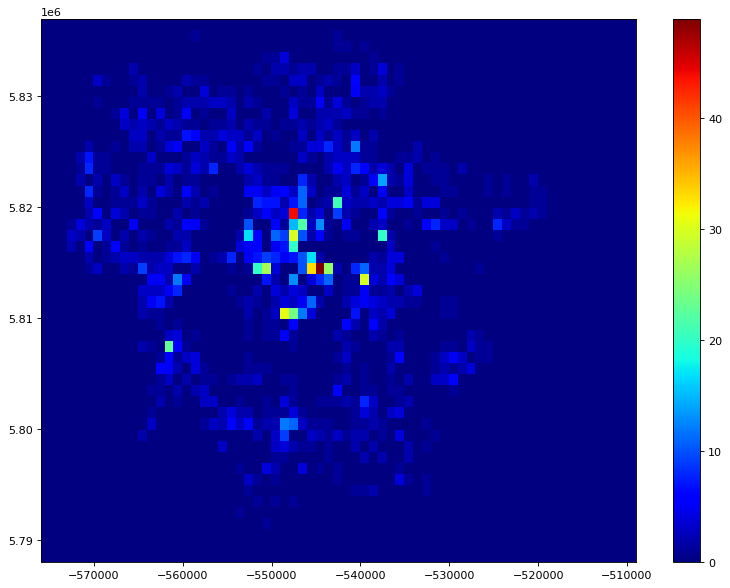

In [63]:
cat = 4
vx = []
vy = []

for venue in venues[categories_names[cat]]:
    tmp = lonlat_to_xy(venue[5],venue[4])
    vx.append(tmp[0])
    vy.append(tmp[1])

plt.figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')    
    
hist = plt.hist2d(vx, vy, cmap=plt.cm.jet, bins=hist_bins,range=hist_range)

plt.colorbar()
plt.show()

In [64]:
high_density = find_high_values_2dhist(max(hist[0].flat) * 0.8, hist)
for venue in high_density:
    venue.append(cat)
    high_density_regions.append(venue)

### Outdoors & Recreation (category 5)

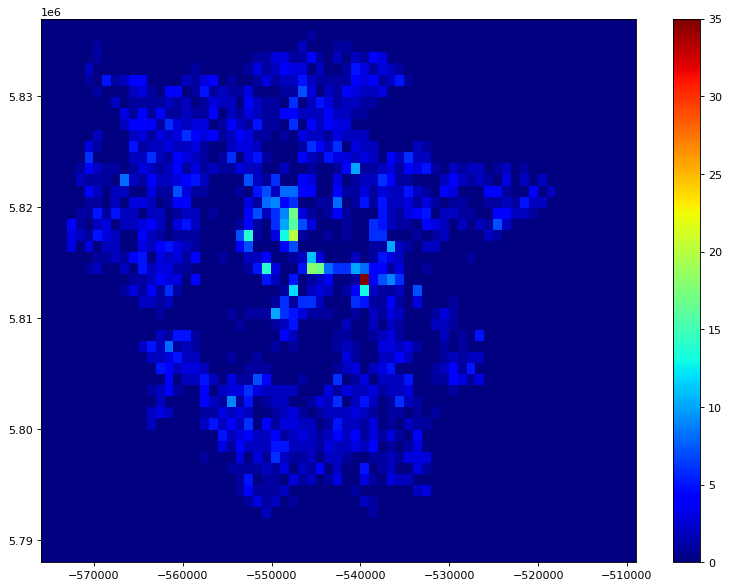

In [65]:
cat = 5
vx = []
vy = []

for venue in venues[categories_names[cat]]:
    tmp = lonlat_to_xy(venue[5],venue[4])
    vx.append(tmp[0])
    vy.append(tmp[1])

plt.figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')    
    
hist = plt.hist2d(vx, vy, cmap=plt.cm.jet, bins=hist_bins,range=hist_range)

plt.colorbar()
plt.show()

In [66]:
high_density = find_high_values_2dhist(max(hist[0].flat) * 0.8, hist)
for venue in high_density:
    venue.append(cat)
    high_density_regions.append(venue)

### Professional & Other Places (category 6)

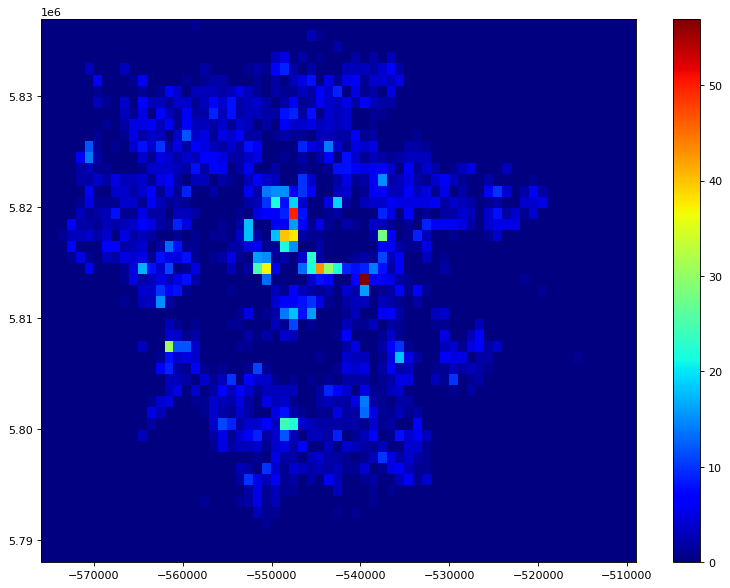

In [67]:
cat = 6
vx = []
vy = []

for venue in venues[categories_names[cat]]:
    tmp = lonlat_to_xy(venue[5],venue[4])
    vx.append(tmp[0])
    vy.append(tmp[1])

plt.figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')    
    
hist = plt.hist2d(vx, vy, cmap=plt.cm.jet, bins=hist_bins,range=hist_range)

plt.colorbar()
plt.show()

In [68]:
high_density = find_high_values_2dhist(max(hist[0].flat) * 0.8, hist)
for venue in high_density:
    venue.append(cat)
    high_density_regions.append(venue)

### Residence (category 7)

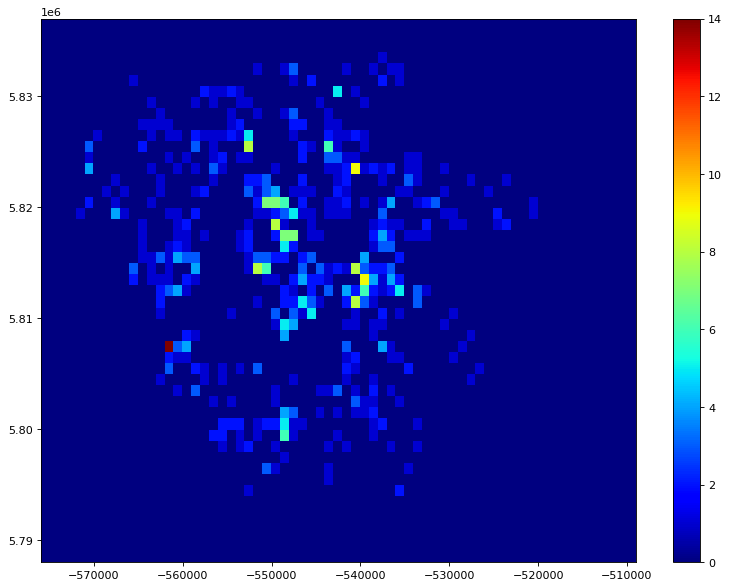

In [69]:
cat = 7
vx = []
vy = []

for venue in venues[categories_names[cat]]:
    tmp = lonlat_to_xy(venue[5],venue[4])
    vx.append(tmp[0])
    vy.append(tmp[1])

plt.figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')    
    
hist = plt.hist2d(vx, vy, cmap=plt.cm.jet, bins=hist_bins,range=hist_range)

plt.colorbar()
plt.show()

In [70]:
high_density = find_high_values_2dhist(max(hist[0].flat) * 0.8, hist)
for venue in high_density:
    venue.append(cat)
    high_density_regions.append(venue)

### Shop & Service (category 8)

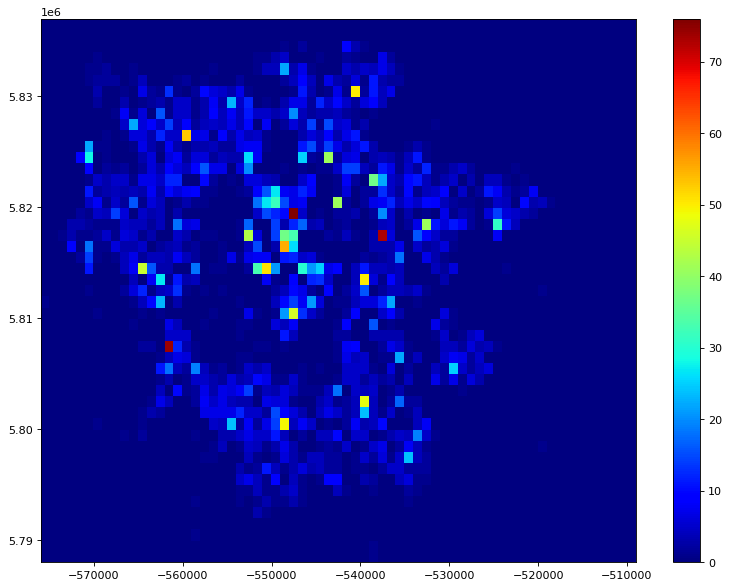

In [71]:
cat = 8
vx = []
vy = []

for venue in venues[categories_names[cat]]:
    tmp = lonlat_to_xy(venue[5],venue[4])
    vx.append(tmp[0])
    vy.append(tmp[1])

plt.figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')    
    
hist = plt.hist2d(vx, vy, cmap=plt.cm.jet, bins=hist_bins,range=hist_range)

plt.colorbar()
plt.show()

In [72]:
high_density = find_high_values_2dhist(max(hist[0].flat) * 0.8, hist)
for venue in high_density:
    venue.append(cat)
    high_density_regions.append(venue)

### Travel & Transport (category 9)

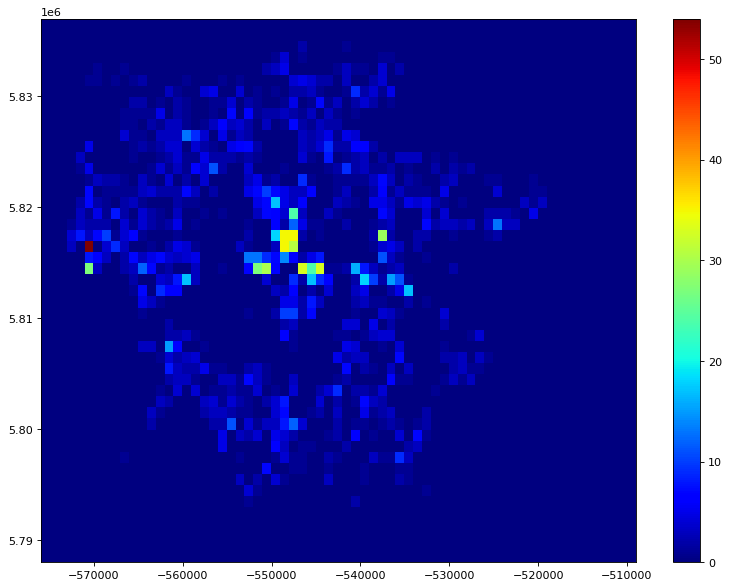

In [73]:
cat = 9
vx = []
vy = []

for venue in venues[categories_names[cat]]:
    tmp = lonlat_to_xy(venue[5],venue[4])
    vx.append(tmp[0])
    vy.append(tmp[1])

plt.figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')    
    
hist = plt.hist2d(vx, vy, cmap=plt.cm.jet, bins=hist_bins,range=hist_range)

plt.colorbar()
plt.show()

In [74]:
high_density = find_high_values_2dhist(max(hist[0].flat) * 0.8, hist)
for venue in high_density:
    venue.append(cat)
    high_density_regions.append(venue)

## Results

Let's take a look at our final results:

In [75]:
high_density_regions

[[51.495152925835896,
  51.50567302361278,
  -0.18145434816708356,
  -0.17050224347462156,
  0],
 [51.495152925835896,
  51.50567302361278,
  -0.18145434816708356,
  -0.17050224347462156,
  1],
 [51.40541060040757,
  51.41593850867571,
  -0.3105003600366575,
  -0.29959899275454255,
  3],
 [51.5353902869941,
  51.54590902099194,
  -0.15153334563044424,
  -0.14056556781137639,
  4],
 [51.49749961012359,
  51.50801306281893,
  -0.09508003530314427,
  -0.08410537566368366,
  4],
 [51.497958445817744,
  51.50846626768656,
  -0.022597532320226623,
  -0.011604264272841473,
  5],
 [51.5353902869941,
  51.54590902099194,
  -0.15153334563044424,
  -0.14056556781137639,
  6],
 [51.497958445817744,
  51.50846626768656,
  -0.022597532320226623,
  -0.011604264272841473,
  6],
 [51.40541060040757,
  51.41593850867571,
  -0.3105003600366575,
  -0.29959899275454255,
  7],
 [51.40541060040757,
  51.41593850867571,
  -0.3105003600366575,
  -0.29959899275454255,
  8],
 [51.5353902869941,
  51.545909020991

It can be seen that some regions are repeated. This is the summary of the results. In the begin of each result listed in high_density_areas we get a list of the categories for which that region is the densest:

In [76]:
high_density_areas = [[[0, 1], 51.495152925835896,  51.50567302361278,  -0.18145434816708356,  -0.17050224347462156],
[[3, 7, 8], 51.40541060040757,  51.41593850867571,  -0.3105003600366575,  -0.29959899275454255],
[[4, 6, 8], 51.5353902869941,  51.54590902099194,  -0.15153334563044424,  -0.14056556781137639],
[[4], 51.49749961012359,  51.50801306281893,  -0.09508003530314427,  -0.08410537566368366],
[[5, 6],51.497958445817744,  51.50846626768656,  -0.022597532320226623,  -0.011604264272841473],
[[8], 51.53634319154898,  51.54685065581309,  -0.0064496246023608445,  0.004555463060711314],
[[9], 51.46664388150644,  51.47718490135682,  -0.46219592547933674,  -0.4513213773880492]]


Let's plot our regions of dense venue distribution over Greater London's map:

In [88]:
map_london = folium.Map(location=london_center, zoom_start=9)

colors = plt.cm.jet(np.linspace(0, 1, len(high_density_areas)))

count_colors = 0
                   
for venue in high_density_areas:

    min_lat, max_lat, min_lon, max_lon = venue[1], venue[2], venue[3], venue[4]

    upper_left=(max_lat, min_lon)
    upper_right=(max_lat, max_lon)
    lower_right=(min_lat, max_lon)
    lower_left=(min_lat, min_lon)
    
    color_hex = matplotlib.colors.to_hex(colors[count_colors][:3])
    line_color = color_hex
    fill_color = color_hex
    count_colors += 1
    weight=4
    edges = [upper_left, upper_right, lower_right, lower_left]
    
    map_london.add_child(folium.vector_layers.Polygon(locations=edges, color=line_color, fill_color=fill_color,
                                                  weight=weight))

map_london

I will create a simple bar graph with the intention of using it as a *legend* for the colors of the areas.

0
Categories #:  [0, 1]
Arts & Entertainment
College & University

1
Categories #:  [3, 7, 8]
Food
Residence
Shop & Service

2
Categories #:  [4, 6, 8]
Nightlife Spot
Professional & Other Places
Shop & Service

3
Categories #:  [4]
Nightlife Spot

4
Categories #:  [5, 6]
Outdoors & Recreation
Professional & Other Places

5
Categories #:  [8]
Shop & Service

6
Categories #:  [9]
Travel & Transport



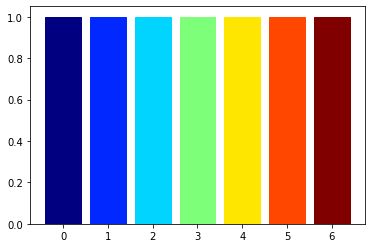

In [40]:
barlist=plt.bar([0,1,2,3,4,5,6], [1,1,1,1,1,1,1])
for color_count in range(len(colors)):
    print(color_count)
    print("Categories #: ", high_density_areas[color_count][0])
    for i in high_density_areas[color_count][0]:
        print(categories_names[i])
    print()
    barlist[color_count].set_color(matplotlib.colors.to_hex(colors[color_count][:3]))
plt.show()

Our final result contains 7 areas of 1 sq-km each. Comments about the areas:

0. Located in the *Kensington and Chelsea* borough, it is a high density area of venues from **two** related categories that could be considered together as **Culture and Education**. Inside it we can find the **Imperial College London**, the **Natural History Museum**, and the **Victoria and Albert Museum**.


1. Located in the *Kingston upon Thames* borough, it has high density of venues from **three** different, somewhat unrelated categories (**Food**, **Residence** and **Shops & Service**).


2. Located in the Camden borough, it has high density of venues from **three** unrelated categories (**Nighlife Spot**, **Professional & Other Places** and **Shop & Service**).

3. Located in the *Southwark* borough, it is a place of high concentration of **Nightlife Spot** venues.

4. Located in the *Tower Hamlets* borough, this area has an interesting mixed profile, as it has a high concentration of **Outdoor & Recreantion** venues, as well as **Professional & Other Places**. Here we can find the **Canary Wharf**, an important business complex.

5. Located in the *Newham* borough, this is an area with high number of **Shop & Service** venues.

6. Located in the *Hillingdon* borough, this area contains the **London Heathrow Airport**.

## Discussion

Some very interesting areas with high density of specific Foursquare venues were detected, that can be used by Real State Agencies to suggest suitable areas of residence for people interested in living in the Greater London. This way, the agency can provide a more customized service to its clients, helping to ensure that the client will be satisfied with the neighborhood in which he/she will live, matching the clients preferences.

Segmenting the Real State Agencies clients according to preferences relative to their way of life, we can make the following recommendatios:


- Clients who give a high value to **Culture and Education**: *area 0, located in Kensington and Chelsea*.


- Clients who wish for a comfortable life, with plenty of **opportunities for a good meal**, and **abundance of services** in a **highly residential region**: *area 1, located in Kingston upon Thames*.


- Clients with a **passion for the night life**: *areas 2 (in Camden) and 3 (in Southwark)*.


- Clients who prioritize their **careers**: *area 2 (in Camden) and 4 (in Tower Hamlets)*.


- Clients who value access to **Outdoor & Recreation** venues: *area 4 (in Tower Hamlets)*

 

## Conclusion

## Acknowledgements

This project was inspired by an example presented in the 5th week of the Applied Data Science Capstone web page at https://cocl.us/coursera_capstone_notebook.

Particularly, part of the code used to divide the area of interest in small circular regions in an hexagonal arrangement was used.

However, I believe that this *inspiration*, and use of *part* of its code, should not be regarded as plagiarism because I do many things differently:

- The purpose of both projects is somewhat similar, but not quite the same. 
- I updated the part of the code that was copied from the other project to use version 2 of the pyproj module (https://pypi.org/project/pyproj/), as the use of version 1 functions issues deprecation warnings.
- I use other APIs that the inspiring project do not use, along with the Foursquare one.
- I query the Foursquare database and preprocess the results in a different way.
- My project is more encompassing, as I do not analyze only restaurants, but almost all Foursquare venue categories (except "Event").
- I do not *cluster* de results, but rather analyze their spatial distribution using 2D histograms.

In [ ]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
 
#for cat_num in range(10):
    
cat_num = 0
vx = []
vy = []

for venue in venues[categories_names[cat_num]]:
    tmp = lonlat_to_xy(venue[5],venue[4])
    #if (tmp[0] >= -555000) and (tmp[0] <= -540000) and (tmp[1] > 5810000) and (tmp[1] < 5825000):
    vx.append(tmp[0])
    vy.append(tmp[1])

print(max(vx)-min(vx))
print(max(vy)-min(vy))
    
hist = plt.hist2d(vx, vy, bins=(20, 20), cmap=plt.cm.jet)
    
    
#plt.hist2d(vx, vy, bins=(20, 20), cmap=plt.cm.jet)
plt.colorbar()
plt.show()


In [ ]:
hist[0]